In [2]:
import os
os.chdir('..')  # Mueve el directorio de trabajo un nivel arriba

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import scipy.signal.windows as win
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.misc import derivative
from matplotlib.colors import hsv_to_rgb
import warnings
from functions_master import *
from glob import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import pyplot as plt
from matplotlib import gridspec
from ipywidgets import interact, FloatSlider
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.animation as animation
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from colorsys import hsv_to_rgb
import matplotlib.cm as cm
from matplotlib.colors import Normalize



# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
c = 0.299792458 # speed of light mm/ps

In [6]:
# sample1_ang_csv = os.path.join(ruta_actual,"sample1_ang.csv")
ruta_actual = os.getcwd()
sample = 2

carpeta_sample1 = os.path.join(ruta_actual,f"EuZn2P2\\src\\sample{sample}_ang")
carpeta_ref_sample1 = os.path.join(ruta_actual,f"EuZn2P2\\src\\reference{sample}")
archivos_dat_ref = glob(os.path.join(os.path.join(carpeta_ref_sample1,f'carpeta1'), '*.dat'))
archivos_dat_samp = glob(os.path.join(os.path.join(carpeta_sample1,f'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat_samp:
    os.remove(archivo)
    print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    print(f'Archivo {archivo} eliminado.')

# print(archivos_dat_samp)

rang = 3
convert_dats(carpeta_ref_sample1,rang)
convert_dats(carpeta_sample1,rang)

# Filtrar y ordenar los archivos por la temperatura
archivos_dat_ref = sorted(
    archivos_dat_ref,
    key=lambda x: extraer_temperatura(x)
)

archivos_dat_samp = sorted(
    archivos_dat_samp,
    key=lambda x: extraer_temperatura(x)
)

Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_100.6K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_104.9K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_109.0K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_113.3K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_117.4K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_121.5K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_24.8K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_33.0K.dat elimi

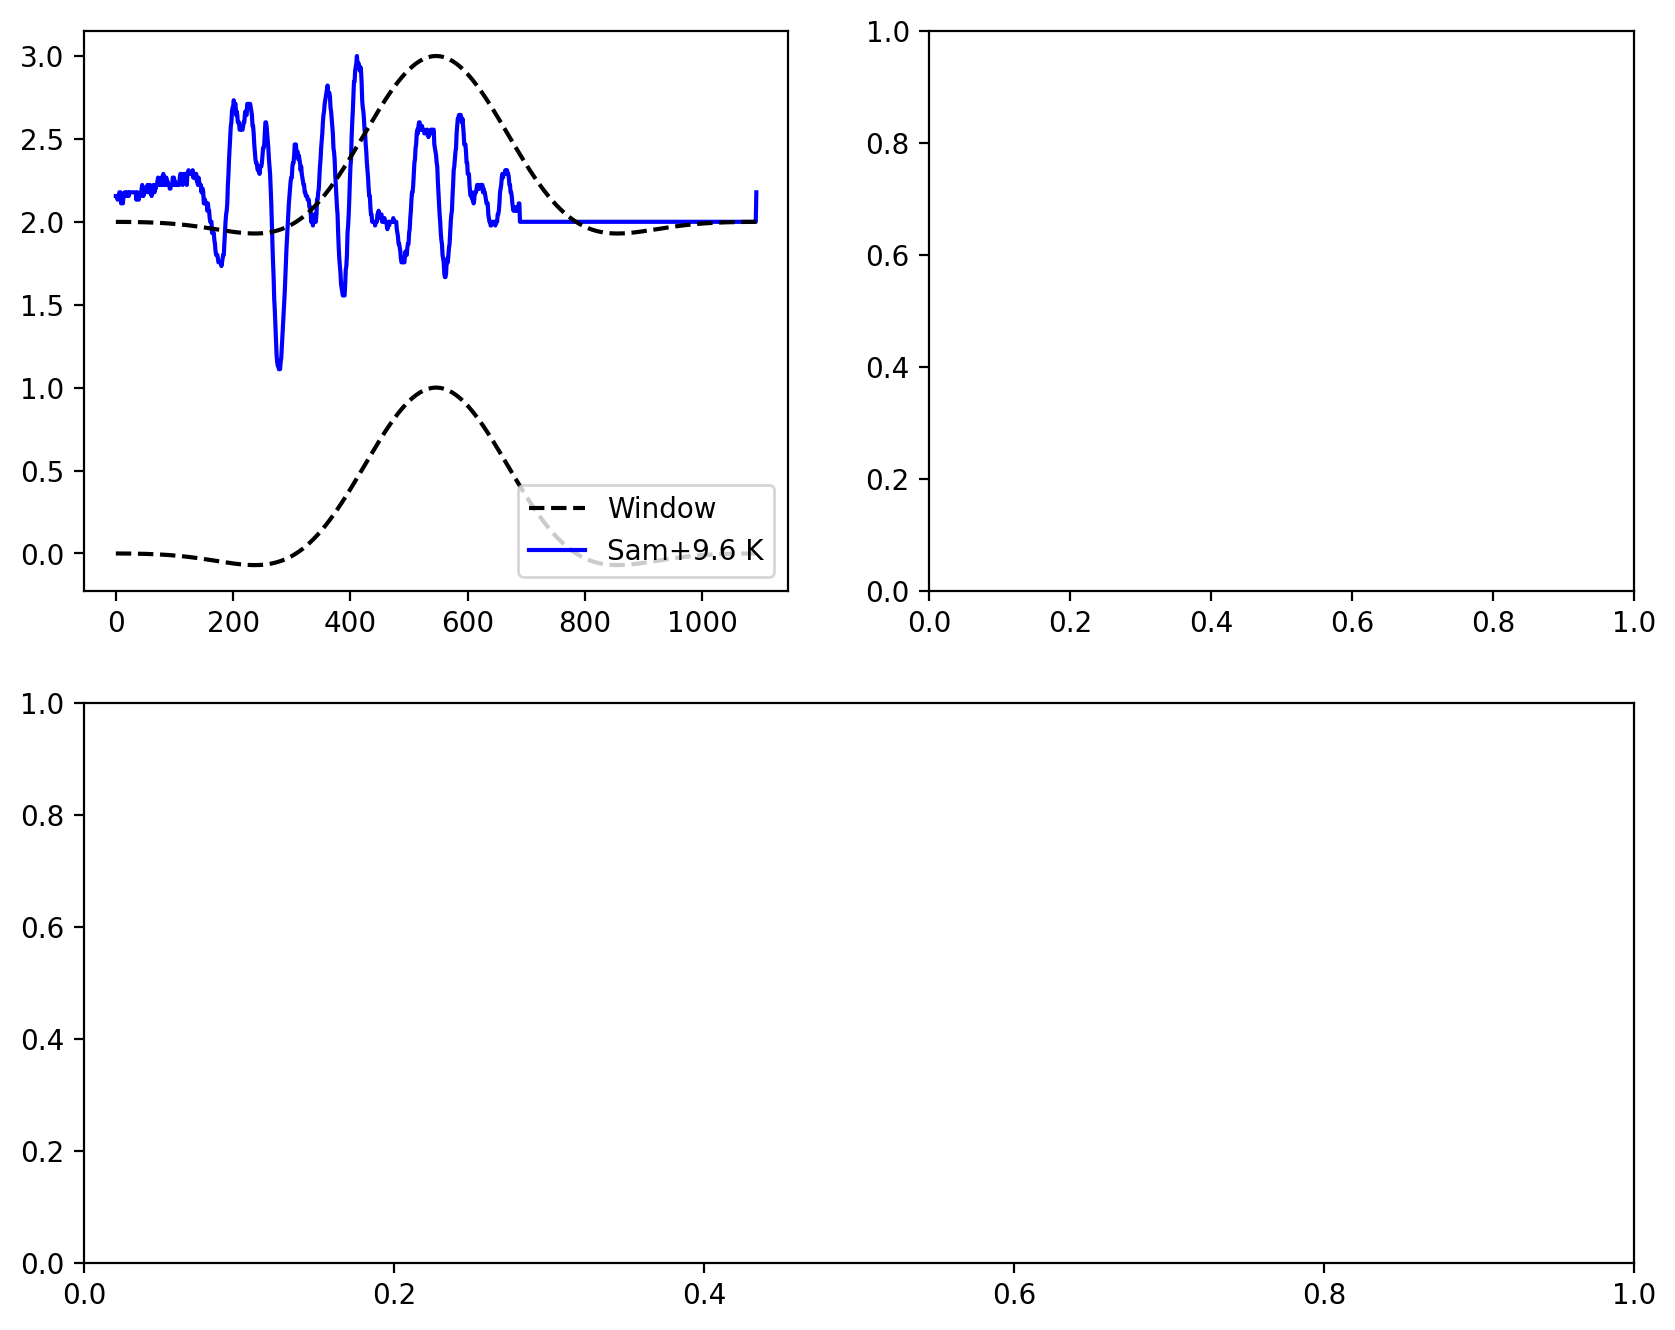

interactive(children=(FloatSlider(value=394.9, continuous_update=False, description='left', max=423.0, min=380…

<function __main__.anim2(left, right_sample, right_subs, index, desv, d)>

In [12]:
from matplotlib import pyplot as plt
from matplotlib import gridspec
from ipywidgets import interact, FloatSlider
import numpy as np
import pandas as pd
import scipy as sp

def anim2(left, right_sample, right_subs, index, desv, d):
    right_ref = right_subs
    N = 2**15

    f = plt.figure(figsize=(10, 8), dpi=200)  # Aumenté el tamaño para 3 subplots

    # Grid: 2 filas, 2 columnas (la última celda ocupará ambas columnas)
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

    # Subgráficos
    ax1 = plt.subplot(gs[0, 0])  # Señales temporales (original)
    ax2 = plt.subplot(gs[0, 1])  # FFTs (nuevo)
    ax3 = plt.subplot(gs[1, :])  # Absorción (ocupa toda la fila inferior)

    # Ruta del archivo de señal y de referencia
    path_signal = archivos_dat_samp[int(index)]
    path_ref = archivos_dat_ref[0]

    # Ventana y señales procesadas
    params_window1 = ['flattop']
    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(
        path_signal, path_ref, left, right_sample, right_subs, params_window1
    )

    # Aplicar ventana
    # y_subs_ventana = pd.Series(y_substrate_padding * ventana)
    # y_signal_ventaneada = pd.Series(y_signal_ventaneada * ventana)

    val = 2  # Desplazamiento para visualización

    # Señales en dominio temporal (subplot 1)
    # ax1.plot(y_subs_ventana / max(y_subs_ventana), 'r', label='Ref')
    ax1.plot(ventana / max(ventana), 'k--', label='Window')
    ax1.plot(y_signal_ventaneada / max(y_signal_ventaneada) + val,'b', label=f'Sam+{extraer_temperatura(path_signal)} K')
    ax1.plot(ventana / max(ventana) + val, 'k--')
    # ax1.set_title("Time Domain Signals")
    ax1.legend(loc='lower right')

    # Dominio de frecuencia
    nu = sp.fft.fftfreq(N, 1/30)
    k = 15
    nu = nu[1:len(nu)//k]

    # Aplicar Fourier y truncar
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada, N)[1:len(nu)+1]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana, N)[1:len(nu)+1]

    # Máscara de frecuencia
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    # Subplot 2: FFTs
    ax2.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)**2/np.abs(max(np.abs(fft_y_signal_ventaneada)**2)),'b', label='Sample FFT')
    ax2.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada)**2/np.abs(max(np.abs(fft_y_subs_ventaneada)**2)),'r', label='Reference FFT')
    ax2.set_title("Frequency Domain")
    ax2.set_ylabel("$|FFT|^{2}$")
    ax2.set_xlabel(r"$\nu$ (THz)")
    ax2.legend()

    # Transmitancia y fase
    T = fft_y_signal_ventaneada / fft_y_subs_ventaneada * np.exp(-1j * 2 * np.pi * nu_filtradas * phase / 30)
    
    # Subplot 3: Absorción (ocupa toda la fila inferior)
    ax3.plot(nu_filtradas, abs(T)**2,'b')
    ax3.set_ylabel(r"$\alpha$")
    ax3.set_xlabel(r"$\nu$ (THz)")
    ax3.set_title("Absorption Spectrum")
    ax3.set_yscale('log')  # Descomenta si quieres escala logarítmica

    plt.tight_layout()

# Interfaz interactiva (sin cambios)
opc = dict(continuous_update=False, readout_format=".3f")
interact(anim2,       
    left=FloatSlider(min=380, max=423, value=394.9, step=0.1, **opc),
    right_sample=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    right_subs=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    index=FloatSlider(min=0, max=len(archivos_dat_samp) - 1, value=0, step=1, **opc),
    desv=FloatSlider(min=0, max=1000, value=190.324, step=0.001, **opc),
    d=FloatSlider(min=0.01, max=1, value=0.627, step=0.01, **opc)
)